1. **DAVIN EDBERT SANTOSO HALIM** - **2602067086**
2. **STEVE MARCELLO LIEM** - **2602071410**
3. **YOSEP KRISNA SUGIHARTO** - **2602074450**

# **About Dataset**

The dataset provided pertains to a survey conducted in 2014 aimed at gauging attitudes toward mental health and the prevalence of mental health disorders in the technology workplace. It encompasses various demographic and work-related attributes, such as age, gender, country of residence, self-employment status, family history of mental illness, treatment sought for mental health conditions, and whether the condition affects work performance. Additionally, it includes insights on company size, remote work status, tech company affiliation, availability of mental health benefits and care options, employer discussions on mental health in wellness programs, provision of resources for seeking help, anonymity regarding mental health treatment, and ease of taking medical leave due to mental health reasons. The dataset further explores perceptions on discussing mental health issues with employers, coworkers, and supervisors during interviews or in the workplace. It also delves into the comparison between mental and physical health prioritization by employers and the observation of negative consequences for colleagues with mental health conditions in the workplace. The dataset concludes with an open-ended section for additional notes or comments. This comprehensive dataset serves as a resource to analyze and understand attitudes, perceptions, and behaviors surrounding mental health in the tech workplace, offering valuable insights for research and policy-making within this domain.

Detailed Dataset Information comes from https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey
1. **`Timestamp`**
2. **`Age`**
3. **`Gender`**
4. **`Country`**
5. **`state`**: If you live in the United States, which state or territory do you live in?
6. **`self_employed`**: Are you self-employed?
7. **`family_history`**: Do you have a family history of mental illness?
8. **`treatment`**: Have you sought treatment for a mental health condition?
9. **`work_interfere`**: If you have a mental health condition, do you feel that it interferes with your work?
10. **`no_employees`**: How many employees does your company or organization have?
11. **`remote_work`**: Do you work remotely (outside of an office) at least 50% of the time?
12. **`tech_company`**: Is your employer primarily a tech company/organization?
13. **`benefits`**: Does your employer provide mental health benefits?
14. **`care_options`**: Do you know the options for mental health care your employer provides?
15. **`wellness_program`**: Has your employer ever discussed mental health as part of an employee wellness program?
16. **`seek_help`**: Does your employer provide resources to learn more about mental health issues and how to seek help?
17. **`anonymity`**: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
18. **`leave`**: How easy is it for you to take medical leave for a mental health condition?
19. **`mental_health_consequence`**: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. **`phys_health_consequence`**: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. **`coworkers`**: Would you be willing to discuss a mental health issue with your coworkers?
22. **`supervisor`**: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. **`mental_health_interview`**: Would you bring up a mental health issue with a potential employer in an interview?
24. **`phys_health_interview`**: Would you bring up a physical health issue with a potential employer in an interview?
25. **`mental_vs_physical`**: Do you feel that your employer takes mental health as seriously as physical health?
26. **`obs_consequence`**: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
27. **`comments`**: Any additional notes or comments

# **Data Understanding**

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [185]:
df = pd.read_csv("survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [186]:
df.shape

(1259, 27)

There are **1259** observations or data points, each characterized by **27** different features or variables.

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [188]:
df.columns = [col.lower() for col in df.columns]

In [189]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [190]:
missing_values = df.isnull().mean() * 100
data_types = df.dtypes
unique_values_count = df.nunique()

summary_df = pd.DataFrame({
    'Missing Percentage': missing_values, 
    'Data Type': data_types, 
    'Unique Values': unique_values_count
})

summary_df.sort_values(by='Missing Percentage', ascending=False)

,Missing Percentage,Data Type,Unique Values
comments,86.973789,object,160
state,40.905481,object,45
work_interfere,20.969023,object,4
self_employed,1.429706,object,2
seek_help,0.000000,object,3
obs_consequence,0.000000,object,2
mental_vs_physical,0.000000,object,3
phys_health_interview,0.000000,object,3
mental_health_interview,0.000000,object,3
supervisor,0.000000,object,3


1. **Comments (86.97% Missing):** This column presents an exceptionally **high percentage of missing data**, signifying a substantial lack of information. It likely contains unstructured text responses, which are **intricate to analyze** within a clustering framework **without employing specific text analysis techniques**. Due to the overwhelming absence of data and the complexity introduced by unstructured text, it's prudent to exclude this column from the analysis to maintain the integrity and reliability of the clustering process.

2. **State (40.91% Missing):** With nearly **41% missing data**, this column lacks substantial information. Additionally, our analysis **doesn't aim for geographical specificity**; hence, the granularity provided by individual states might not contribute significantly to the intended analysis. Omitting this column ensures that the analysis focuses more on relevant attributes, enhancing the quality and applicability of the clustering process.

3. **Work_interfere (20.97% Missing):** Although essential in gauging work-related mental health impacts, this column contains a significant 21% missing data. This compromises data reliability and analysis quality, **potentially skewing outcomes if retained**. Prioritizing completeness in the dataset for a comprehensive understanding of workplace mental health attitudes necessitates excluding this column. This decision ensures the analysis relies on more complete and dependable information, enhancing its integrity and validity.

4. **Timestamp:** The exact survey completion time contained in this column **isn't particularly pertinent** for clustering purposes unless a time-based analysis is specifically targeted. Given that the focus is on understanding attitudes and perceptions towards mental health rather than time-related patterns, excluding the timestamp column won't compromise the clustering analysis.

In [191]:
df = df.drop(['timestamp', 'state', 'comments', 'work_interfere'], axis=1)

Dropping the unrelevant column using **'df.drop'**

In [192]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the lists of column names
print("Numerical Columns:", numerical_columns)
print()
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['age']

Categorical Columns: ['gender', 'country', 'self_employed', 'family_history', 'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [193]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

age                          0.000000
gender                       0.000000
country                      0.000000
self_employed                1.429706
family_history               0.000000
treatment                    0.000000
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
dtype: float64


We still have **1.429706% of NaN Values** in column **'self_employed'**

## How do we handle missing values?

In [194]:
df['self_employed'].isnull().sum()

18

In [195]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [196]:
#Using mode to fill the missing values
mode_value = df['self_employed'].mode()[0]
df['self_employed'].fillna(mode_value, inplace=True)

Using **mode** to **replace missing values** in a **categorical variable** is appropriate because it **represents the most common category,** preserving the overall distribution and characteristics of the data. This simple and interpretable method **ensures that imputed values align with the prevailing categories** in the dataset.

In [197]:
df['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

In [198]:
df['self_employed'].isnull().sum()

0

In [199]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

age                          0.0
gender                       0.0
country                      0.0
self_employed                0.0
family_history               0.0
treatment                    0.0
no_employees                 0.0
remote_work                  0.0
tech_company                 0.0
benefits                     0.0
care_options                 0.0
wellness_program             0.0
seek_help                    0.0
anonymity                    0.0
leave                        0.0
mental_health_consequence    0.0
phys_health_consequence      0.0
coworkers                    0.0
supervisor                   0.0
mental_health_interview      0.0
phys_health_interview        0.0
mental_vs_physical           0.0
obs_consequence              0.0
dtype: float64


Now, the dataset is **clean** from **NaN Values**

# NUMERICAL

In [200]:
summary_statistics = df.describe()
summary_statistics

,age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [201]:
df['age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

The frequency distribution of ages within the dataset is evident, highlighting **potential outliers** in the age distribution. To gain a more comprehensive understanding, visualizing this distribution through a boxplot would offer further insights into the presence and extent of outliers. This graphical representation will provide a clearer illustration of the spread, central tendency, and any exceptional values in the dataset's age distribution.

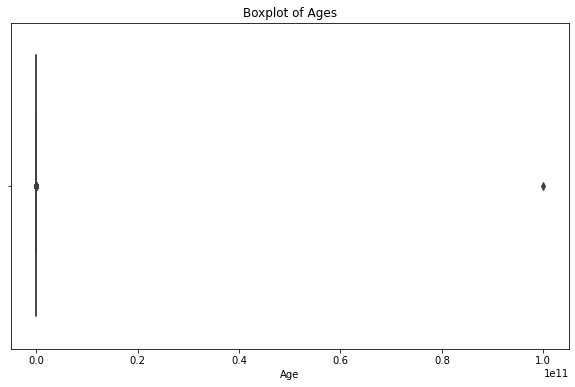

In [202]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['age'])
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.show()

The **boxplot** shows the **'Age'** data with **one point far from the rest,** which is an **outlier.** The **central box,** which usually shows the middle half of the data, **is squished** because the **outlier is so extreme.**

What we need to do:
- **Remove or fix the outlier if it's a mistake.**

In **clustering,** this outlier could mess up the groupings, so it's often best to handle it before we start the analysis.

In [203]:
df = df[df['age'].between(16, 80)]

cleaned_age = df['age'].describe()
cleaned_age

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64

We narrows down the **'age'** data to people **between 16 and 80 years old** because that's the age **range most people are working.** It **removes** any ages **outside this range,** which helps focus out analysis on the group we're interested in **(Working Age).** After filtering, the code then shows a summary to check the new age range and make sure it looks right. This makes sure the clustering looks at the right ages and **isn't thrown off** by **very young** or **very old people** who **aren't typically in the workforce.**

In [204]:
df['age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: age, dtype: int64

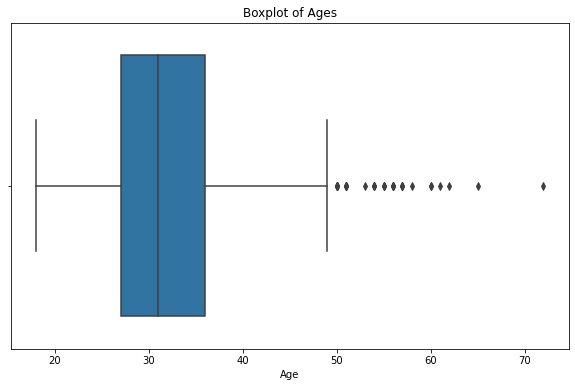

In [205]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['age'])
plt.title('Boxplot of Ages')
plt.xlabel('Age')
plt.show()

In [206]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df['age'] < lower_bound) | (df['age'] > upper_bound)

In [207]:
num_outliers = outliers.sum()
percentage_outliers = (num_outliers / len(df)) * 100
print("Age")
print(f"Number of outliers: {num_outliers}")
print(f"Percentage of outliers: {percentage_outliers}%")

Age
Number of outliers: 32
Percentage of outliers: 2.5579536370903275%


**The reason why we keep outliers:**

In our data, some ages are a lot higher than most. These are called outliers. We've decided to keep these outliers in our data for a few good reasons:

1. **They're Real:** The very high ages are unusual, but they're not mistakes—they reflect the older people in the group we're studying.

2. **They Add Value:** Our goal is to group the data in meaningful ways. If we took out these outliers, we might miss out on some interesting patterns, like if there's a special group of older individuals.

3. **Algorithms Can Handle It:** The methods we're using to group the data are pretty smart. They can deal with a few outliers without getting confused.

4. **Complete Picture:** We want to understand everyone in our data, not just the most common cases. Keeping the outliers helps us do that.

So, we're keeping these outliers because they're part of the real story our data is telling us.

In [208]:
df.head()

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


# CATEGORICAL

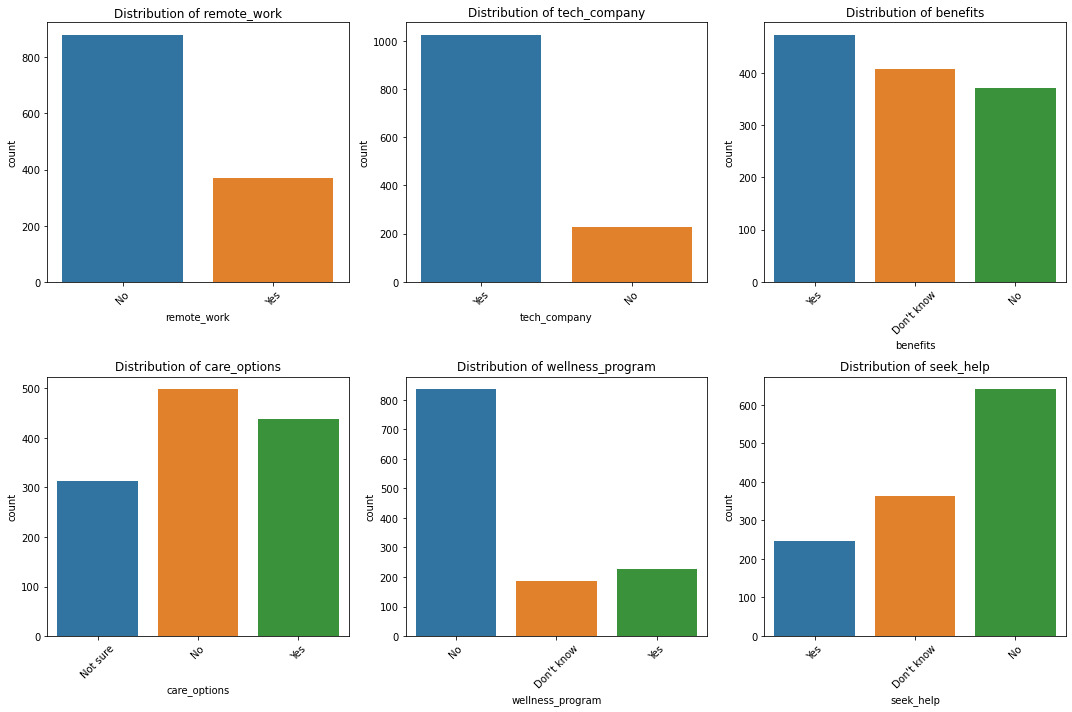

In [209]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[6:12], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

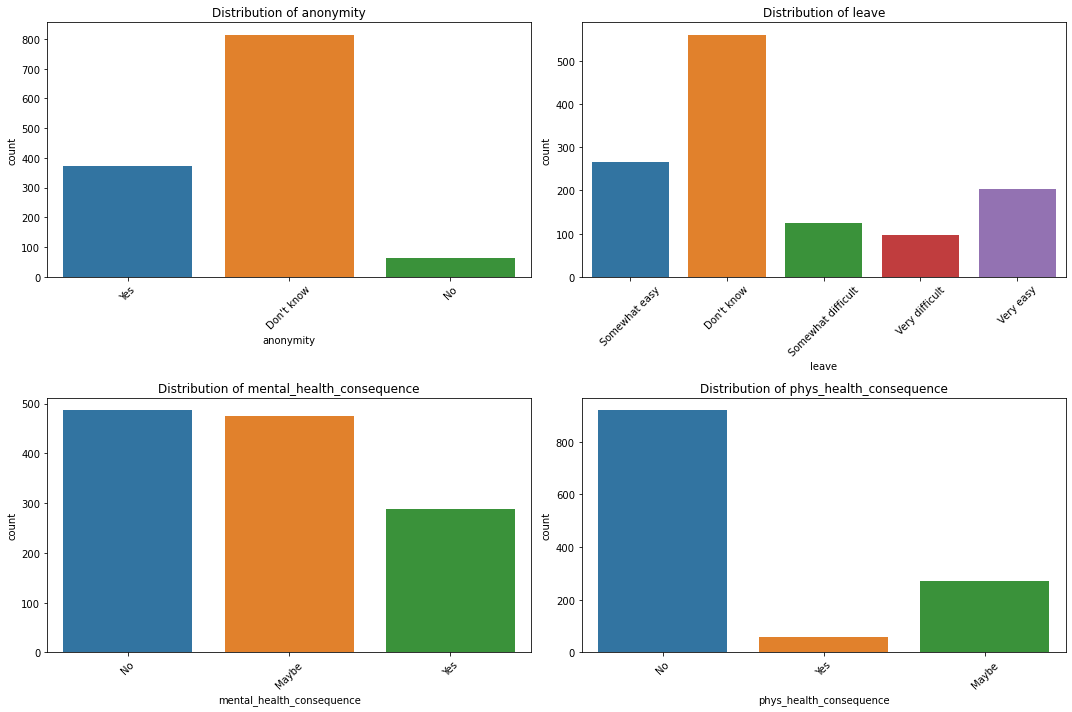

In [210]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=df, x=categorical_columns[12])
plt.title(f'Distribution of {categorical_columns[12]}')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.countplot(data=df, x=categorical_columns[13])
plt.title(f'Distribution of {categorical_columns[13]}')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.countplot(data=df, x=categorical_columns[14])
plt.title(f'Distribution of {categorical_columns[14]}')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(data=df, x=categorical_columns[15])
plt.title(f'Distribution of {categorical_columns[15]}')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

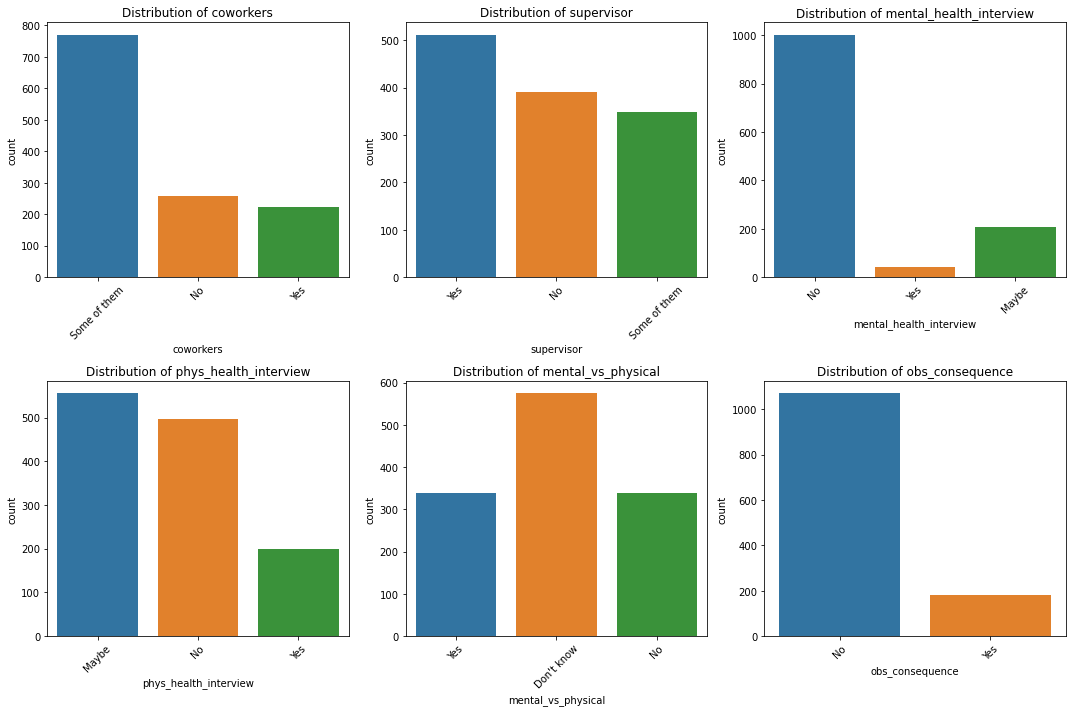

In [211]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[16:23], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

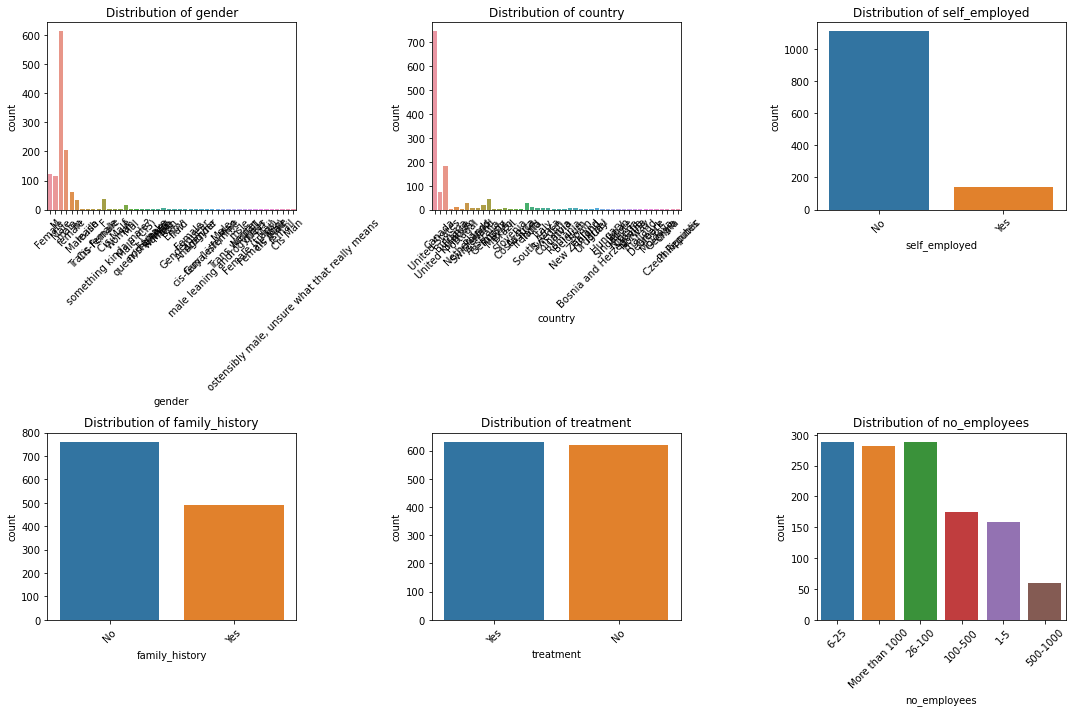

In [212]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The analysis of the plot indicates the necessity to address the **'gender'** and **'country'** variables due to the substantial number of distinct classes, posing challenges for encoding. The high cardinality of these categorical variables complicates data preprocessing, and thus, steps should be taken to manage or restructure these variables for improved feature representation in subsequent modeling tasks.

## Handling `gender` column

In [213]:
df['gender'].value_counts()

Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man                     

In [214]:
female_values = ['Female', 'female', 'F', 'f', 'Woman', 'Female', 'Female (trans)', 'Trans woman', 'Female (cis)', 'cis-female/femme',
                'femail', 'Trans-female', 'Cis Female', 'queer/she/they', 'Femake', 'woman']
male_values = ['Male', 'male', 'M', 'm', 'Make', 'Man', 'Male', 'Cis Male', 'Man', 'Malr', 'male leaning androgynous', 
               'Cis Man', 'msle', 'cis male', 'Mail', 'Guy (-ish) ^_^', 'Male (CIS)', 'Male-ish', 'maile', 'something kinda male?',
              'Mal', 'ostensibly male, unsure what that really means'] 

df['gender'].replace(female_values, 'female', inplace=True)
df['gender'].replace(male_values, 'male', inplace=True)

df['gender'].replace(to_replace=[value for value in df['gender'].unique() 
                                 if value not in ['female', 'male']], 
                     value='others', inplace=True)

This code aims to **standardize gender** labels in the 'gender' column for consistency and interpretability. It **consolidates diverse representations of 'female' and 'male' into uniform categories.** Additionally, **any values beyond these gender categories are generalized as 'others,'** **simplifying the dataset** and promoting clarity in subsequent analyses. This meticulous approach **ensures a cohesive** and **unambiguous** representation of **gender information,** facilitating accurate and meaningful insights from the data.

In [215]:
df['gender'].value_counts()

male      987
female    250
others     14
Name: gender, dtype: int64

## Handling country

In [216]:
df['country'].value_counts()

United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

In [217]:
threshold = 40
small_count_countries = df['country'].value_counts()[df['country'].value_counts() <= threshold].index

df['country'].replace(small_count_countries, 'Other', inplace=True)

Setting a threshold of **40** for small counts streamlines visualizations, **focusing on dominant categories** for **clearer interpretation.** This **reduces noise**, **simplifies analysis**, and **enhances generalization**, **presenting key trends without overwhelming detail.** Adjusting the threshold **ensures a balance between meaningful insights and visual clarity in categorical data representations.**

In [218]:
df['country'].value_counts()

United States     746
Other             204
United Kingdom    184
Canada             72
Germany            45
Name: country, dtype: int64

## Checking Gender and Country

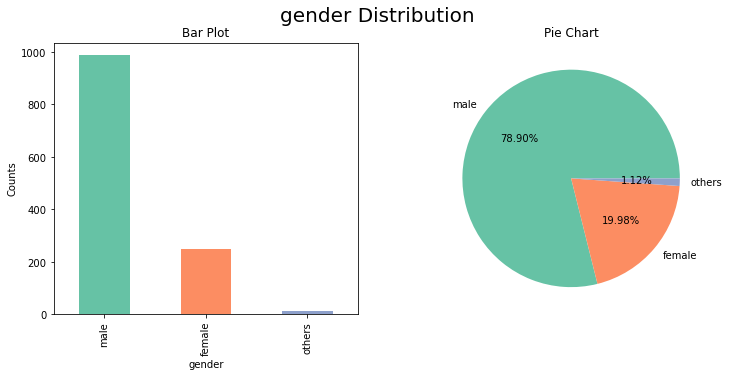

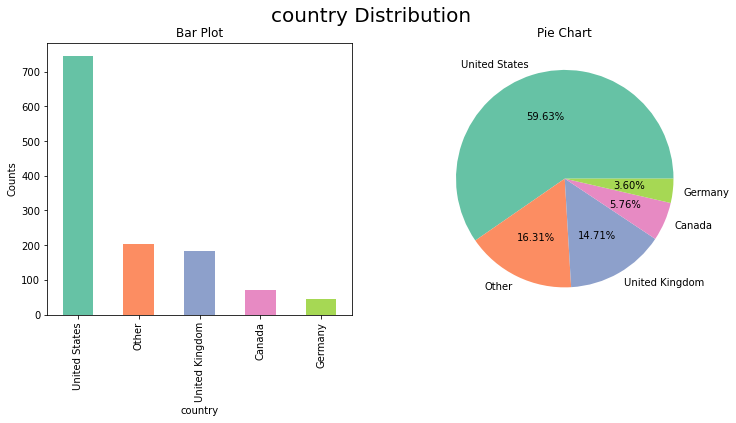

In [219]:
columns_to_plot = ['gender', 'country']
palette = sns.color_palette("Set2")

for column in columns_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'{column} Distribution', fontsize=20)

    plt.subplot(1, 2, 1)
    df[column].value_counts().plot(kind='bar', color=palette)
    plt.title('Bar Plot')
    plt.xlabel(column)
    plt.ylabel('Counts')

    plt.subplot(1, 2, 2)
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", colors=palette)
    plt.title('Pie Chart')
    plt.ylabel('')

    plt.show()

# **Feature Engineering**

In [220]:
df.head()

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1251 non-null   int64 
 1   gender                     1251 non-null   object
 2   country                    1251 non-null   object
 3   self_employed              1251 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   no_employees               1251 non-null   object
 7   remote_work                1251 non-null   object
 8   tech_company               1251 non-null   object
 9   benefits                   1251 non-null   object
 10  care_options               1251 non-null   object
 11  wellness_program           1251 non-null   object
 12  seek_help                  1251 non-null   object
 13  anonymity                  1251 non-null   object
 14  leave   

# **One Hot Encoding**

## **`gender`**

In [222]:
df['gender'].value_counts()

male      987
female    250
others     14
Name: gender, dtype: int64

In [223]:
gender_encoded = pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df, gender_encoded], axis=1)

## **`benefits`**

In [224]:
df['benefits'].value_counts()

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64

In [225]:
benefits_encoded = pd.get_dummies(df['benefits'], prefix='benefits')
df = pd.concat([df, benefits_encoded], axis=1)

## **`care_options`**

In [226]:
df['care_options'].value_counts()

No          499
Yes         439
Not sure    313
Name: care_options, dtype: int64

In [227]:
care_options_encoded = pd.get_dummies(df['care_options'], prefix='care_options')
df = pd.concat([df, care_options_encoded], axis=1)

## **`wellness_program`**

In [228]:
df['wellness_program'].value_counts()

No            837
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

In [229]:
wellness_program_encoded = pd.get_dummies(df['wellness_program'], prefix='wellness_program')
df = pd.concat([df, wellness_program_encoded], axis=1)

## **`seek_help`**

In [230]:
df['seek_help'].value_counts()

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64

In [231]:
seek_help_encoded = pd.get_dummies(df['seek_help'], prefix='seek_help')
df = pd.concat([df, seek_help_encoded], axis=1)

## **`anonymity`**

In [232]:
df['anonymity'].value_counts()

Don't know    815
Yes           372
No             64
Name: anonymity, dtype: int64

In [233]:
anonymity_encoded = pd.get_dummies(df['anonymity'], prefix='anonymity')
df = pd.concat([df, anonymity_encoded], axis=1)

## **`mental_health_consequence`**

In [234]:
df['mental_health_consequence'].value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

In [235]:
mental_health_consequence_encoded = pd.get_dummies(df['mental_health_consequence'], prefix='mental_health_consequence')
df = pd.concat([df, mental_health_consequence_encoded], axis=1)

## **`phys_health_consequence`**

In [236]:
df['phys_health_consequence'].value_counts()

No       920
Maybe    273
Yes       58
Name: phys_health_consequence, dtype: int64

In [237]:
phys_health_consequence_encoded = pd.get_dummies(df['phys_health_consequence'], prefix='phys_health_consequence')
df = pd.concat([df, phys_health_consequence_encoded], axis=1)

## **`coworkers`**

In [238]:
df['coworkers'].value_counts()

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64

In [239]:
coworkers_encoded = pd.get_dummies(df['coworkers'], prefix='coworkers')
df = pd.concat([df, coworkers_encoded], axis=1)

## **`supervisor`**

In [240]:
df['supervisor'].value_counts()

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64

In [241]:
supervisor_encoded = pd.get_dummies(df['supervisor'], prefix='supervisor')
df = pd.concat([df, supervisor_encoded], axis=1)

## **`mental_health_interview`**

In [242]:
df['mental_health_interview'].value_counts()

No       1003
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64

In [243]:
mental_health_interview_encoded = pd.get_dummies(df['mental_health_interview'], prefix='mental_health_interview')
df = pd.concat([df, mental_health_interview_encoded], axis=1)

## **`phys_health_interview`**

In [244]:
df['phys_health_interview'].value_counts()

Maybe    555
No       496
Yes      200
Name: phys_health_interview, dtype: int64

In [245]:
phys_health_interview_encoded = pd.get_dummies(df['phys_health_interview'], prefix='phys_health_interview')
df = pd.concat([df, phys_health_interview_encoded], axis=1)

## **`mental_vs_physical`**

In [246]:
df['mental_vs_physical'].value_counts()

Don't know    574
Yes           339
No            338
Name: mental_vs_physical, dtype: int64

In [247]:
mental_vs_physical_encoded = pd.get_dummies(df['mental_vs_physical'], prefix='mental_vs_physical')
df = pd.concat([df, mental_vs_physical_encoded], axis=1)

# **Label Encoding**

## **`leave`**

In [248]:
df['leave'].value_counts()

Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

In [249]:
encoding_map = {
    'Very easy': 0,
    'Somewhat easy': 1,
    'Don\'t know': 2,
    'Somewhat difficult': 3,
    'Very difficult': 4
}

df['leave_encoded'] = df['leave'].map(encoding_map)

# **Frequency Encoding**

## **`country`**

In [250]:
df['country'].value_counts()

United States     746
Other             204
United Kingdom    184
Canada             72
Germany            45
Name: country, dtype: int64

In [251]:
frequency_map = df['country'].value_counts(normalize=True)
df['country_freq_encoded'] = df['country'].map(frequency_map)

## **`no_employees`**

In [252]:
df['no_employees'].value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64

In [253]:
frequency_map = df['no_employees'].value_counts(normalize=True)
df['no_employees_freq_encoded'] = df['no_employees'].map(frequency_map)

# **Binary Encoding**

## **`self_employed`**

In [254]:
df['self_employed'].value_counts()

No     1109
Yes     142
Name: self_employed, dtype: int64

In [255]:
encoding_map = {"No": 0, "Yes": 1}
df['self_employed_encoded'] = df['self_employed'].map(encoding_map)

## **`family_history`**

In [256]:
df['family_history'].value_counts()

No     762
Yes    489
Name: family_history, dtype: int64

In [257]:
encoding_map = {"No": 0, "Yes": 1}
df['family_history_encoded'] = df['family_history'].map(encoding_map)

## **`treatment`**

In [258]:
df['treatment'].value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

In [259]:
encoding_map = {"No": 0, "Yes": 1}
df['treatment_encoded'] = df['treatment'].map(encoding_map)

## **`remote_work`**

In [260]:
df['remote_work'].value_counts()

No     880
Yes    371
Name: remote_work, dtype: int64

In [261]:
encoding_map = {"No": 0, "Yes": 1}
df['remote_work_encoded'] = df['remote_work'].map(encoding_map)

## **`tech_company`**

In [262]:
df['tech_company'].value_counts()

Yes    1025
No      226
Name: tech_company, dtype: int64

In [263]:
encoding_map = {"No": 0, "Yes": 1}
df['tech_company_encoded'] = df['tech_company'].map(encoding_map)

## **`obs_consequence`**

In [264]:
df['obs_consequence'].value_counts()

No     1070
Yes     181
Name: obs_consequence, dtype: int64

In [265]:
encoding_map = {"No": 0, "Yes": 1}
df['obs_consequence_encoded'] = df['obs_consequence'].map(encoding_map)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 71 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1251 non-null   int64  
 1   gender                           1251 non-null   object 
 2   country                          1251 non-null   object 
 3   self_employed                    1251 non-null   object 
 4   family_history                   1251 non-null   object 
 5   treatment                        1251 non-null   object 
 6   no_employees                     1251 non-null   object 
 7   remote_work                      1251 non-null   object 
 8   tech_company                     1251 non-null   object 
 9   benefits                         1251 non-null   object 
 10  care_options                     1251 non-null   object 
 11  wellness_program                 1251 non-null   object 
 12  seek_help           

## **Slicing DataFrame**

In [267]:
selected_columns = df.iloc[:, list(range(0, 1)) + list(range(23, 71))]
df_encoded = selected_columns.copy()

In [268]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1251 non-null   int64  
 1   gender_female                    1251 non-null   uint8  
 2   gender_male                      1251 non-null   uint8  
 3   gender_others                    1251 non-null   uint8  
 4   benefits_Don't know              1251 non-null   uint8  
 5   benefits_No                      1251 non-null   uint8  
 6   benefits_Yes                     1251 non-null   uint8  
 7   care_options_No                  1251 non-null   uint8  
 8   care_options_Not sure            1251 non-null   uint8  
 9   care_options_Yes                 1251 non-null   uint8  
 10  wellness_program_Don't know      1251 non-null   uint8  
 11  wellness_program_No              1251 non-null   uint8  
 12  wellness_program_Yes

In [269]:
selected_columns = df.iloc[:, 0:23]
df_no_encoded = selected_columns.copy()

In [270]:
df_no_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1251 non-null   int64 
 1   gender                     1251 non-null   object
 2   country                    1251 non-null   object
 3   self_employed              1251 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   no_employees               1251 non-null   object
 7   remote_work                1251 non-null   object
 8   tech_company               1251 non-null   object
 9   benefits                   1251 non-null   object
 10  care_options               1251 non-null   object
 11  wellness_program           1251 non-null   object
 12  seek_help                  1251 non-null   object
 13  anonymity                  1251 non-null   object
 14  leave   

In [271]:
df_encoded_kmeans = df_encoded.copy()
df_encoded_kmeans_age_standardized = df_encoded.copy()
df_no_encoded_kmeans = df_no_encoded.copy()

df_encoded_agl = df_encoded.copy()
df_encoded_agl_age_standardized = df_encoded.copy()
df_no_encoded_agl = df_no_encoded.copy()

# **Clustering: K-Means**

The decision to employ k-means clustering as the **initial model** for this dataset stems from several key considerations. Firstly, k-means is a widely used and efficient clustering algorithm known for its simplicity and scalability, making it suitable for handling relatively large datasets. Secondly, it assumes clusters based on centroids, aiming to minimize intra-cluster variability, which aligns with the objective of identifying distinct groups or patterns within the data related to mental health perceptions in the workplace. Additionally, k-means does not require a large number of parameters to be tuned, making it relatively straightforward to implement and interpret. Given the exploratory nature of this analysis and the desire to uncover inherent structures or groupings within the dataset, k-means serves as an appropriate starting point, providing insights into potential clusters or associations among the features that could further inform subsequent analyses or interventions related to workplace mental health.

In [272]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [273]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_encoded_kmeans)

    silhouette_avg = silhouette_score(df_encoded_kmeans, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.45024380682442955
For n_clusters = 3 The average silhouette_score is : 0.3596543910834068
For n_clusters = 4 The average silhouette_score is : 0.32180578354613865
For n_clusters = 5 The average silhouette_score is : 0.24115215371793203
For n_clusters = 6 The average silhouette_score is : 0.20103642029472016
For n_clusters = 7 The average silhouette_score is : 0.16931876490550324
For n_clusters = 8 The average silhouette_score is : 0.15312405049866548
For n_clusters = 9 The average silhouette_score is : 0.13130384768529108


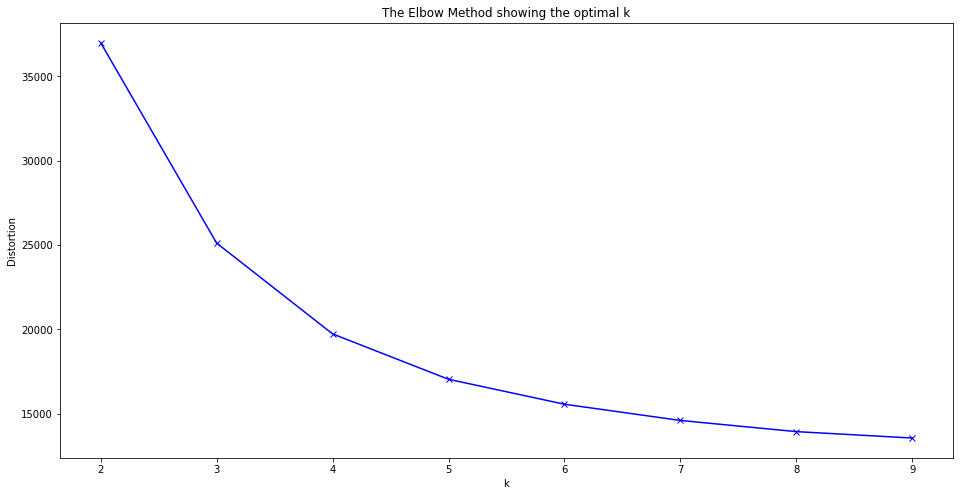

In [274]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [275]:
#Based on silhouette score and elbow method cluster 2 is the best one
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(df_encoded_kmeans)

KMeans(n_clusters=2)

In [276]:
df_no_encoded_kmeans['k_means']=kmeanModel.predict(df_encoded_kmeans)

In [277]:
df_no_encoded_kmeans['k_means'].value_counts()

1    798
0    453
Name: k_means, dtype: int64

In [278]:
df_encoded_kmeans.head()

,age,gender_female,gender_male,gender_others,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,...,mental_vs_physical_Yes,leave_encoded,country_freq_encoded,no_employees_freq_encoded,self_employed_encoded,family_history_encoded,treatment_encoded,remote_work_encoded,tech_company_encoded,obs_consequence_encoded
0,37,1,0,0,0,0,1,0,1,0,...,1,1,0.596323,0.231015,0,0,1,0,1,0
1,44,0,1,0,1,0,0,1,0,0,...,0,2,0.596323,0.224620,0,0,0,0,0,0
2,32,0,1,0,0,1,0,1,0,0,...,0,3,0.057554,0.231015,0,0,0,0,1,0
3,31,0,1,0,0,1,0,0,0,1,...,0,3,0.147082,0.230216,0,1,1,0,1,1
4,31,0,1,0,0,0,1,1,0,0,...,0,2,0.596323,0.139888,0,0,0,1,1,0


In [279]:
cluster_0=df_no_encoded_kmeans[df_no_encoded_kmeans['k_means']==0]

In [280]:
cluster_1=df_no_encoded_kmeans[df_no_encoded_kmeans['k_means']==1]

# **Persona Analysis**

## **Cluster 0**

In [281]:
cluster_0.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'k_means'],
      dtype='object')

In [282]:
cluster_0.head()

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,k_means
0,37,female,United States,No,No,Yes,6-25,No,Yes,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,0
1,44,male,United States,No,No,No,More than 1000,No,No,Don't know,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,0
6,35,female,United States,No,Yes,Yes,1-5,Yes,Yes,No,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,0
7,39,male,Canada,No,No,No,1-5,Yes,Yes,No,...,Don't know,No,No,No,No,No,No,No,No,0
8,42,female,United States,No,Yes,Yes,100-500,No,Yes,Yes,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,0


In [283]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453 entries, 0 to 1257
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        453 non-null    int64 
 1   gender                     453 non-null    object
 2   country                    453 non-null    object
 3   self_employed              453 non-null    object
 4   family_history             453 non-null    object
 5   treatment                  453 non-null    object
 6   no_employees               453 non-null    object
 7   remote_work                453 non-null    object
 8   tech_company               453 non-null    object
 9   benefits                   453 non-null    object
 10  care_options               453 non-null    object
 11  wellness_program           453 non-null    object
 12  seek_help                  453 non-null    object
 13  anonymity                  453 non-null    object
 14  leave    

In [284]:
cluster_0.describe()

,age,k_means
count,453.000000,453.0
mean,39.677704,0.0
std,5.785423,0.0
min,34.000000,0.0
25%,35.000000,0.0
50%,38.000000,0.0
75%,42.000000,0.0
max,72.000000,0.0


age
Skew : 1.8


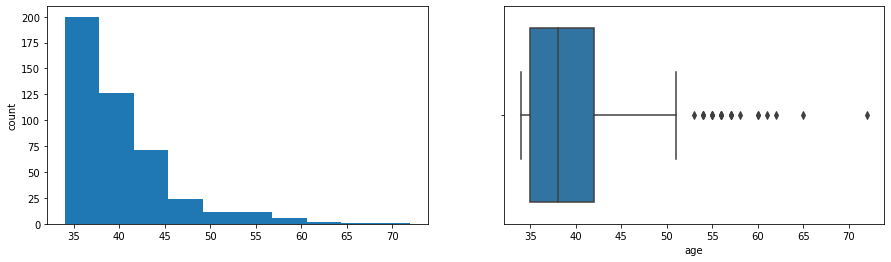

In [285]:
num_cols = ['age']
num_cols
for col in num_cols:
    print(col)
    print('Skew :', round(cluster_0[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cluster_0[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cluster_0[col])
    plt.show()

In [286]:
cluster_0['gender'].value_counts()

male      374
female     76
others      3
Name: gender, dtype: int64

In [287]:
cluster_0['country'].value_counts()

United States     310
Other              61
United Kingdom     53
Canada             17
Germany            12
Name: country, dtype: int64

In [288]:
cluster_0['self_employed'].value_counts()

No     394
Yes     59
Name: self_employed, dtype: int64

In [289]:
cluster_0['family_history'].value_counts()

No     266
Yes    187
Name: family_history, dtype: int64

In [290]:
cluster_0['treatment'].value_counts()

Yes    246
No     207
Name: treatment, dtype: int64

In [291]:
cluster_0['no_employees'].value_counts()

More than 1000    126
26-100             91
6-25               81
1-5                65
100-500            60
500-1000           30
Name: no_employees, dtype: int64

In [292]:
cluster_0['remote_work'].value_counts()

No     284
Yes    169
Name: remote_work, dtype: int64

In [293]:
cluster_0['tech_company'].value_counts()

Yes    349
No     104
Name: tech_company, dtype: int64

In [294]:
cluster_0['benefits'].value_counts()

Yes           206
No            125
Don't know    122
Name: benefits, dtype: int64

In [295]:
cluster_0['care_options'].value_counts()

Yes         184
No          165
Not sure    104
Name: care_options, dtype: int64

In [296]:
cluster_0['wellness_program'].value_counts()

No            285
Yes           107
Don't know     61
Name: wellness_program, dtype: int64

In [297]:
cluster_0['seek_help'].value_counts()

No            211
Yes           122
Don't know    120
Name: seek_help, dtype: int64

In [298]:
cluster_0['anonymity'].value_counts()

Don't know    289
Yes           148
No             16
Name: anonymity, dtype: int64

In [299]:
cluster_0['leave'].value_counts()

Don't know            201
Somewhat easy          96
Very easy              68
Somewhat difficult     47
Very difficult         41
Name: leave, dtype: int64

In [300]:
cluster_0['mental_health_consequence'].value_counts()

Maybe    176
No       157
Yes      120
Name: mental_health_consequence, dtype: int64

In [301]:
cluster_0['phys_health_consequence'].value_counts()

No       304
Maybe    122
Yes       27
Name: phys_health_consequence, dtype: int64

In [302]:
cluster_0['coworkers'].value_counts()

Some of them    282
No               96
Yes              75
Name: coworkers, dtype: int64

In [303]:
cluster_0['supervisor'].value_counts()

Yes             181
No              140
Some of them    132
Name: supervisor, dtype: int64

In [304]:
cluster_0['mental_health_interview'].value_counts()

No       377
Maybe     64
Yes       12
Name: mental_health_interview, dtype: int64

In [305]:
cluster_0['phys_health_interview'].value_counts()

Maybe    205
No       189
Yes       59
Name: phys_health_interview, dtype: int64

In [306]:
cluster_0['mental_vs_physical'].value_counts()

Don't know    209
No            126
Yes           118
Name: mental_vs_physical, dtype: int64

In [307]:
cluster_0['obs_consequence'].value_counts()

No     375
Yes     78
Name: obs_consequence, dtype: int64

## **Cluster 1**

In [308]:
cluster_1.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'k_means'],
      dtype='object')

In [309]:
cluster_1.head()

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,k_means
2,32,male,Canada,No,No,No,6-25,No,Yes,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,1
3,31,male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,1
4,31,male,United States,No,No,No,100-500,Yes,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,1
5,33,male,United States,No,Yes,No,6-25,No,Yes,Yes,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,1
9,23,male,Canada,No,No,No,26-100,No,Yes,Don't know,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,1


In [310]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 798 entries, 2 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        798 non-null    int64 
 1   gender                     798 non-null    object
 2   country                    798 non-null    object
 3   self_employed              798 non-null    object
 4   family_history             798 non-null    object
 5   treatment                  798 non-null    object
 6   no_employees               798 non-null    object
 7   remote_work                798 non-null    object
 8   tech_company               798 non-null    object
 9   benefits                   798 non-null    object
 10  care_options               798 non-null    object
 11  wellness_program           798 non-null    object
 12  seek_help                  798 non-null    object
 13  anonymity                  798 non-null    object
 14  leave    

In [311]:
cluster_1.describe()

,age,k_means
count,798.000000,798.0
mean,27.761905,1.0
std,3.584569,0.0
min,18.000000,1.0
25%,25.000000,1.0
50%,28.000000,1.0
75%,31.000000,1.0
max,33.000000,1.0


age
Skew : -0.4


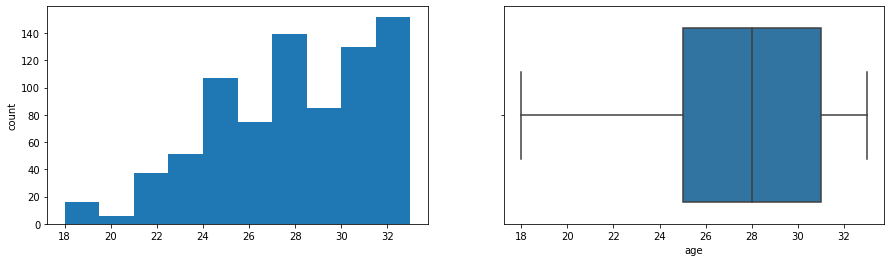

In [312]:
num_cols = ['age']
num_cols
for col in num_cols:
    print(col)
    print('Skew :', round(cluster_1[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    cluster_1[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cluster_1[col])
    plt.show()

In [313]:
cluster_1['gender'].value_counts()

male      613
female    174
others     11
Name: gender, dtype: int64

In [314]:
cluster_1['country'].value_counts()

United States     436
Other             143
United Kingdom    131
Canada             55
Germany            33
Name: country, dtype: int64

In [315]:
cluster_1['self_employed'].value_counts()

No     715
Yes     83
Name: self_employed, dtype: int64

In [316]:
cluster_1['family_history'].value_counts()

No     496
Yes    302
Name: family_history, dtype: int64

In [317]:
cluster_1['treatment'].value_counts()

No     412
Yes    386
Name: treatment, dtype: int64

In [318]:
cluster_1['no_employees'].value_counts()

6-25              208
26-100            197
More than 1000    155
100-500           115
1-5                93
500-1000           30
Name: no_employees, dtype: int64

In [319]:
cluster_1['remote_work'].value_counts()

No     596
Yes    202
Name: remote_work, dtype: int64

In [320]:
cluster_1['tech_company'].value_counts()

Yes    676
No     122
Name: tech_company, dtype: int64

In [321]:
cluster_1['benefits'].value_counts()

Don't know    285
Yes           267
No            246
Name: benefits, dtype: int64

In [322]:
cluster_1['care_options'].value_counts()

No          334
Yes         255
Not sure    209
Name: care_options, dtype: int64

In [323]:
cluster_1['wellness_program'].value_counts()

No            552
Don't know    126
Yes           120
Name: wellness_program, dtype: int64

In [324]:
cluster_1['seek_help'].value_counts()

No            430
Don't know    243
Yes           125
Name: seek_help, dtype: int64

In [325]:
cluster_1['anonymity'].value_counts()

Don't know    526
Yes           224
No             48
Name: anonymity, dtype: int64

In [326]:
cluster_1['leave'].value_counts()

Don't know            360
Somewhat easy         169
Very easy             135
Somewhat difficult     78
Very difficult         56
Name: leave, dtype: int64

In [327]:
cluster_1['mental_health_consequence'].value_counts()

No       330
Maybe    300
Yes      168
Name: mental_health_consequence, dtype: int64

In [328]:
cluster_1['phys_health_consequence'].value_counts()

No       616
Maybe    151
Yes       31
Name: phys_health_consequence, dtype: int64

In [329]:
cluster_1['coworkers'].value_counts()

Some of them    489
No              162
Yes             147
Name: coworkers, dtype: int64

In [330]:
cluster_1['supervisor'].value_counts()

Yes             331
No              250
Some of them    217
Name: supervisor, dtype: int64

In [331]:
cluster_1['mental_health_interview'].value_counts()

No       626
Maybe    143
Yes       29
Name: mental_health_interview, dtype: int64

In [332]:
cluster_1['phys_health_interview'].value_counts()

Maybe    350
No       307
Yes      141
Name: phys_health_interview, dtype: int64

In [333]:
cluster_1['mental_vs_physical'].value_counts()

Don't know    365
Yes           221
No            212
Name: mental_vs_physical, dtype: int64

In [334]:
cluster_1['obs_consequence'].value_counts()

No     695
Yes    103
Name: obs_consequence, dtype: int64

## Feature Scaling: Standardization

In [335]:
df_encoded_kmeans.head()

,age,gender_female,gender_male,gender_others,benefits_Don't know,benefits_No,benefits_Yes,care_options_No,care_options_Not sure,care_options_Yes,...,mental_vs_physical_Yes,leave_encoded,country_freq_encoded,no_employees_freq_encoded,self_employed_encoded,family_history_encoded,treatment_encoded,remote_work_encoded,tech_company_encoded,obs_consequence_encoded
0,37,1,0,0,0,0,1,0,1,0,...,1,1,0.596323,0.231015,0,0,1,0,1,0
1,44,0,1,0,1,0,0,1,0,0,...,0,2,0.596323,0.224620,0,0,0,0,0,0
2,32,0,1,0,0,1,0,1,0,0,...,0,3,0.057554,0.231015,0,0,0,0,1,0
3,31,0,1,0,0,1,0,0,0,1,...,0,3,0.147082,0.230216,0,1,1,0,1,1
4,31,0,1,0,0,0,1,1,0,0,...,0,2,0.596323,0.139888,0,0,0,1,1,0


In [336]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_age = scaler.fit_transform(df_encoded_kmeans_age_standardized[['age']])
df_encoded_kmeans_age_standardized['age'] = scaled_age

In [337]:
df_encoded_kmeans_age_standardized.head()
df_encoded_agl_age_standardized = df_encoded_kmeans_age_standardized.copy()

In [338]:
df_no_encoded_kmeans = df_no_encoded_kmeans.drop('k_means', axis=1)
df_no_encoded_kmeans.head()

,age,gender,country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [339]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(df_encoded_kmeans_age_standardized)

    silhouette_avg = silhouette_score(df_encoded_kmeans_age_standardized, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.09127906355090182
For n_clusters = 3 The average silhouette_score is : 0.0750243635911458
For n_clusters = 4 The average silhouette_score is : 0.0805634619950887
For n_clusters = 5 The average silhouette_score is : 0.06972574457336936
For n_clusters = 6 The average silhouette_score is : 0.06871391887453761
For n_clusters = 7 The average silhouette_score is : 0.06725032550437109
For n_clusters = 8 The average silhouette_score is : 0.06411640870214563
For n_clusters = 9 The average silhouette_score is : 0.06517083599620259


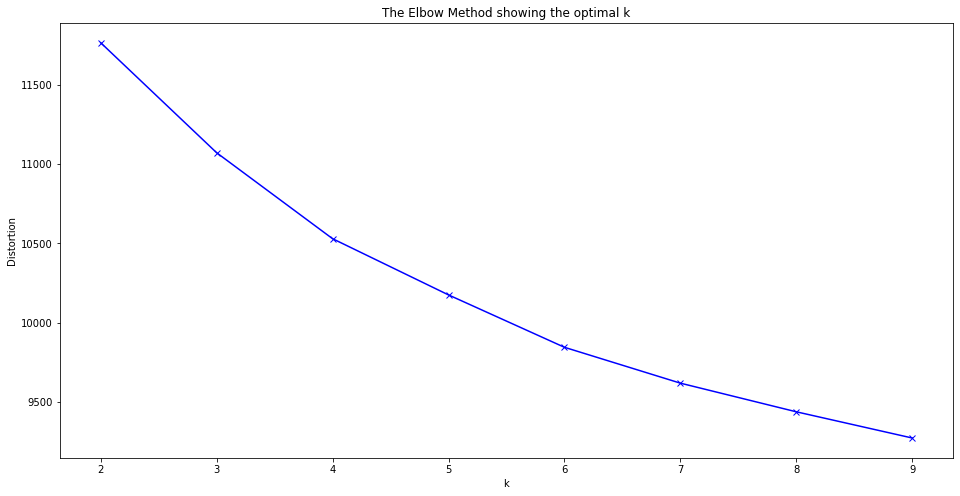

In [340]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Clustering: Agglomerative

### without age standardization

In [341]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

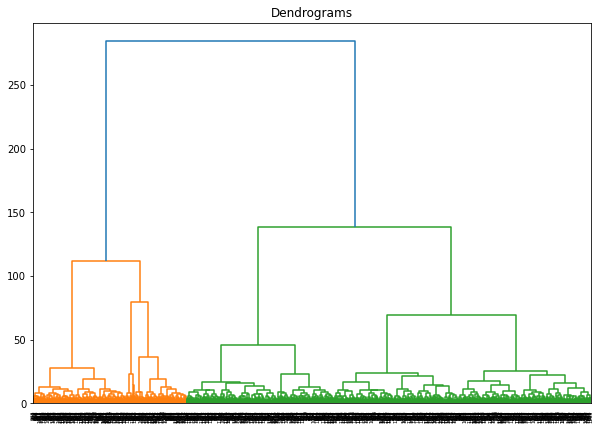

In [342]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_encoded_agl, method='ward'))
plt.show()

### n = 2

In [343]:
Aglmodel = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
Aglmodel.fit(df_encoded_agl)

AgglomerativeClustering()

In [344]:
df_encoded_agl['agl']=Aglmodel.fit_predict(df_encoded_agl)

In [345]:
df_encoded_agl['agl'].value_counts()

0    907
1    344
Name: agl, dtype: int64

In [346]:
silhouette_avg = silhouette_score(df_encoded_agl, Aglmodel.labels_)
print(silhouette_avg)

0.45619009236815256


### n = 3

In [347]:
Aglmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Aglmodel.fit(df_encoded_agl)

AgglomerativeClustering(n_clusters=3)

In [348]:
df_encoded_agl['agl']=Aglmodel.fit_predict(df_encoded_agl)

In [349]:
df_encoded_agl['agl'].value_counts()

1    576
0    344
2    331
Name: agl, dtype: int64

In [350]:
silhouette_avg = silhouette_score(df_encoded_agl, Aglmodel.labels_)
print(silhouette_avg)

0.29788936132227994


### with age standardization

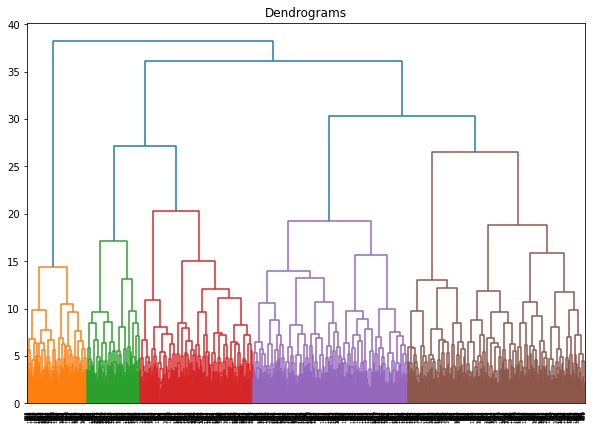

In [351]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_encoded_agl_age_standardized, method='ward'))
plt.show()

### n = 2

In [352]:
Aglmodel = AgglomerativeClustering(n_clusters=2, affinity='euclidean')
Aglmodel.fit(df_encoded_agl_age_standardized)

AgglomerativeClustering()

In [353]:
df_encoded_agl_age_standardized['agl']=Aglmodel.fit_predict(df_encoded_agl_age_standardized)

In [354]:
df_encoded_agl_age_standardized['agl'].value_counts()

0    1116
1     135
Name: agl, dtype: int64

In [355]:
silhouette_avg = silhouette_score(df_encoded_agl_age_standardized, Aglmodel.labels_)
print(silhouette_avg)

0.12080850144140516


### n = 3

In [356]:
Aglmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
Aglmodel.fit(df_encoded_agl_age_standardized)

AgglomerativeClustering(n_clusters=3)

In [357]:
df_encoded_agl_age_standardized['agl']=Aglmodel.fit_predict(df_encoded_agl_age_standardized)

In [358]:
df_encoded_agl_age_standardized['agl'].value_counts()

0    744
2    372
1    135
Name: agl, dtype: int64

In [359]:
silhouette_avg = silhouette_score(df_encoded_agl_age_standardized, Aglmodel.labels_)
print(silhouette_avg)

0.11896813251296909


### Why is using a dataset with an age column without standardization better?

In [360]:
df_encoded['age'].value_counts()

29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
39    33
40    33
43    28
41    21
22    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
48     6
50     6
20     6
51     5
49     4
56     4
55     3
57     3
54     3
47     2
60     2
58     1
62     1
65     1
53     1
61     1
72     1
Name: age, dtype: int64

The **`age`** column in the provided dataset exhibits a broad and relatively evenly distributed range of ages without significant outliers or clusters, encompassing individuals across various age groups. Due to this natural distribution and the lack of extreme variations in scale compared to other features, standardization might not offer substantial benefits for clustering. Algorithms sensitive to feature scales, like k-means, may not be significantly influenced by the diverse age ranges present. Standardizing 'age' could potentially obscure inherent age-related patterns, crucial for interpreting and understanding the data accurately within the context of clustering analysis. Therefore, in this dataset, the 'age' feature's inherent distribution seemingly doesn't necessitate standardization for effective clustering analysis.